<a href="https://colab.research.google.com/github/lenaphamthi/TestExercises/blob/main/KTGK-XD%26DGHN_MoHinhPhanLop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Đề bài cho 2 tập dữ liệu Breast cancer và Wine. Trong bài làm em phân chia từng tập dữ liệu riêng để xác định dữ liệu cần thiết, xây dựng mô hình,thông báo kết quả, đánh giá, ghi bảng so sánh và cuối cùng nhận xét giữa các mô hình, giúp cho ta dễ dàng quan sát bài làm. Đầu tiên em xác định tập dữ liệu Wine, tiếp theo là tập dữ liệu Breast Cancer.

**Câu 1 : Tải tập dữ liệu Wine**

1. [Wine](https://archive.ics.uci.edu/ml/datasets/Wine)

Khai báo các thư viện cần thiết

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.naive_bayes import MultinomialNB

Đọc tập dữ liệu Wine 

In [87]:
data_wine = pd.read_csv('/content/wine.data', header = None)
data_wine.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
47,1,13.90,1.68,2.12,16.0,101,3.10,3.39,0.21,2.14,6.1,0.91,3.33,985
152,3,13.11,1.90,2.75,25.5,116,2.20,1.28,0.26,1.56,7.1,0.61,1.33,425
107,2,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.3,0.88,2.42,488
132,3,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.7,0.66,1.36,560
141,3,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.6,0.70,2.47,780



Khai báo các thuộc tính của tập dữ liệu 

 	1) Alcohol
 	2) Malic acid
 	3) Ash
 	4) Alcalinity of ash  
 	5) Magnesium
 	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
 	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline            


Chỉnh sửa tên các thuộc tính của tập dữ liệu

In [88]:
data_wine.columns = ['Label', 'Alcohol', 'Malic acid', 'Ash', 
                     'Alcalinity_of_ash', 'Magnesium', 
                     'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
                     'Proanthocyanins', 'Color_intensity', 'Hue',
                     'OD280/OD315_of_diluted_wines', 'Proline']
data_wine.sample(5)

,Label,Alcohol,Malic acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
79,2,12.70,3.87,2.40,23.0,101,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463
106,2,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510
41,1,13.41,3.84,2.12,18.8,90,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035
44,1,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885
127,2,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466


**Câu 2: Xác định tập dữ liệu Wine**

*1. Thuộc tính nào đóng vai trò nhãn lớp?*

Trả lời: Label

*2. Tập dữ liệu nào phục vụ bài toán phân lớp nhị phân? Bài toán nào phân lớp đa nhãn?*

Trả lời: Tập dữ liệu Wine phục vụ bài toán phân lớp đa nhãn 

*3. Thuộc tính nào không cần thiết trong huấn luyện mô hình?*

Trả lời: Label 

**Câu 3: Xây dựng mô hình phân lớp LogisticRegression, k-NN và Naive Bays cho 2 tập dữ liệu trên. Yêu cầu:**


*1. Xác định nhãn lớp có cân bằng không?*

Trả lời : Các nhãn lớp không cân bằng 

In [89]:
fre = data_wine[['Alcohol', 'Label']].groupby(['Label']).count()
fre.columns = ['Times']
fre

,Times
Label,
1,59
2,71
3,48


Xác định các dữ liệu đầu vào 

In [90]:
X = data_wine[['Alcohol', 'Malic acid', 'Ash', 
                     'Alcalinity_of_ash', 'Magnesium', 
                     'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
                     'Proanthocyanins', 'Color_intensity', 'Hue',
                     'OD280/OD315_of_diluted_wines', 'Proline']].values
y = data_wine['Label'].values
#Ban đầu ta có các nhãn lớp mặc định là 1,2,3. 
#Ta đổi các nhãn thành 0,1,2 cho phù hợp với mô hình bằng cách -1
y = y - 1
print(X.shape)
print(y.shape)

(178, 13)
(178,)


*2.Phân chia train - test theo tỉ lệ 80% - 20% có cần thực hiện xáo trộn dữ liệu hay không?*

Trả lời : Phân chia train - test theo tỉ lệ 80% - 20% cần thực hiện xáo trộn dữ liệu


In [91]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=4, shuffle = True,stratify=y)
print('Kích thước dữ liệu train - test:')
print("\t\tX train: ", X_train.shape, "; y train: ",y_train.shape)
print("\t\tX test: ", X_test.shape, "; y test: ",y_test.shape)

Kích thước dữ liệu train - test:
		X train:  (142, 13) ; y train:  (142,)
		X test:  (36, 13) ; y test:  (36,)


Huấn luyện mô hình k-NN 


In [92]:
knn_wine = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 3)
knn_wine.fit(X_train, y_train)
y_pred_knn_wine= knn_wine.predict(X_test)

Huấn luyện mô hình Naive Bayes

In [103]:
mnb_wine = MultinomialNB()
mnb_wine.fit(X_train, y_train)
y_pred_nb_wine = mnb_wine.predict(X_test)

*3. Thông báo kết quả **10-fold CV** của **quá trình huấn luyện** từng mô hình (sử dụng **cross_val_scores**)*

Cross-validation là một phương pháp kiểm tra độ chính xác của 1 máy học dựa trên một tập dữ liệu học cho trước

Quá trình huấn luyện mô hình k-NN 

In [93]:
#Hàm chạy k_fold mặc định là 10-fold
#sử dụng cross_val_scores in ra 10-fold CV 
def k_fold(model, X, y, cv = 10):
  accuracy_list = cross_val_score(model, X, y, cv=10)
  print('* Chi tiết các fold')
  for i in range(0, len(accuracy_list)):
    print(f'> Fold {i+1}  - Accuracy: {accuracy_list[i]}')

  print('* Đánh giá tổng thể các folds: ')
  print(f'> Accuracy: {np.mean(accuracy_list)} (Độ lệch +- {np.std(accuracy_list)})')

In [94]:
k_fold(knn_wine, X, y)

* Chi tiết các fold
> Fold 1  - Accuracy: 0.8333333333333334
> Fold 2  - Accuracy: 0.7777777777777778
> Fold 3  - Accuracy: 0.6111111111111112
> Fold 4  - Accuracy: 0.5555555555555556
> Fold 5  - Accuracy: 0.6111111111111112
> Fold 6  - Accuracy: 0.7222222222222222
> Fold 7  - Accuracy: 0.7777777777777778
> Fold 8  - Accuracy: 0.7777777777777778
> Fold 9  - Accuracy: 0.8235294117647058
> Fold 10  - Accuracy: 0.8235294117647058
* Đánh giá tổng thể các folds: 
> Accuracy: 0.7313725490196078 (Độ lệch +- 0.09683133923223304)


Quá trình huấn luyện mô hình Naive Bayes 

In [95]:
k_fold(mnb_wine, X, y)

* Chi tiết các fold
> Fold 1  - Accuracy: 0.7222222222222222
> Fold 2  - Accuracy: 0.8888888888888888
> Fold 3  - Accuracy: 0.7777777777777778
> Fold 4  - Accuracy: 0.7777777777777778
> Fold 5  - Accuracy: 0.6666666666666666
> Fold 6  - Accuracy: 0.9444444444444444
> Fold 7  - Accuracy: 0.8333333333333334
> Fold 8  - Accuracy: 0.9444444444444444
> Fold 9  - Accuracy: 1.0
> Fold 10  - Accuracy: 0.9411764705882353
* Đánh giá tổng thể các folds: 
> Accuracy: 0.8496732026143791 (Độ lệch +- 0.1052673172564091)


*4. Dựa vào kết quả dự đoán của từng mô hình - ŷ và tập dữ liệu kiểm chứng - y$_{test}$, hãy:*

a. Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số: (i) accuracy; (ii) precision;
(iii) recall; và (iv) f1-measure.

Đánh giá hiệu năng mô hình k-NN 


In [96]:
def danh_gia_mo_hinh(y_test, y_hat):
  #(i) accuracy 
  i = accuracy_score(y_test,y_hat)
  #(ii) precision 
  # Tính độ chính xác của từng nhãn lớp 
  ii_None = precision_score(y_test,y_hat , average=None)
  # Tính tổng số lượng dữ liệu được dự đoán đúng so với tập dữ liệu 
  ii_micro = precision_score(y_test,y_hat , average='micro')
  #(iii) recall 
  iii = recall_score(y_test,y_hat, average = None)
  #(iv) f1-measure 
  iv = list(f1_score(y_test, y_hat, average=None))
  return i, ii_None, iii, iv

In [101]:
i_knn,ii_knn,iii_knn,iv_knn= danh_gia_mo_hinh(y_test,y_pred_knn_wine)
print("Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(i) accuracy:",i_knn)
print("Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(ii) precision:",ii_knn)
print("Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(iii) recall:",iii_knn) 
print("Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(iv) f1-measure:",iv_knn)

Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(i) accuracy: 0.7222222222222222
Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(ii) precision: [0.84615385 0.69230769 0.6       ]
Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(iii) recall: [0.91666667 0.64285714 0.6       ]
Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(iv) f1-measure: [0.8799999999999999, 0.6666666666666666, 0.6]


Đánh giá hiệu năng mô hình Naive Bayes 

In [104]:
i_nb,ii_nb,iii_nb,iv_nb= danh_gia_mo_hinh(y_test,y_pred_nb_wine) 
print("Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(i) accuracy:",i_nb)
print("Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(ii) precision:",ii_nb)
print("Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(iii) recall:",iii_nb) 
print("Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(iv) f1-measure:",iv_nb)

Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(i) accuracy: 0.8888888888888888
Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(ii) precision: [1.         0.86666667 0.81818182]
Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(iii) recall: [0.83333333 0.92857143 0.9       ]
Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(iv) f1-measure: [0.9090909090909091, 0.896551724137931, 0.8571428571428572]


b. Vẽ bảng ghi kết quả so sánh các chỉ số trên của từng mô hình

In [105]:
#báo cáo phân lớp tổng hợp của mô hình k-NN 
target_names = ['class 0', 'class 1','class 2']
report1 = classification_report(y_test, y_pred_knn_wine, target_names=target_names)
print(report1)

              precision    recall  f1-score   support

     class 0       0.85      0.92      0.88        12
     class 1       0.69      0.64      0.67        14
     class 2       0.60      0.60      0.60        10

    accuracy                           0.72        36
   macro avg       0.71      0.72      0.72        36
weighted avg       0.72      0.72      0.72        36



In [107]:
#báo cáo phân lớp tổng hợp của mô hình k-NN 
report2 = classification_report(y_test, y_pred_nb_wine, target_names=target_names)
print(report2)

              precision    recall  f1-score   support

     class 0       1.00      0.83      0.91        12
     class 1       0.87      0.93      0.90        14
     class 2       0.82      0.90      0.86        10

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.90      0.89      0.89        36



In [108]:
#bảng ghi kết quả so sánh các chỉ số trên của từng mô hình
danh_gia_knn = [i_knn, ii_knn, iii_knn, iv_knn]
danh_gia_nb = [i_nb, ii_nb, iii_nb, iv_nb]
data = {'k-NN': danh_gia_knn, 
        'Naive Bayes': danh_gia_nb}
id = ['accuracy (so sánh giữa 2 mô hình)', 'precision (so sánh giữa các nhãn lớp)', 'recall (so sánh giữa các nhãn lớp)', 'f1-measure (so sánh giữa các nhãn lớp)']
df = pd.DataFrame(data=data, index = id)
df

,k-NN,Naive Bayes
accuracy (so sánh giữa 2 mô hình),0.722222,0.888889
precision (so sánh giữa các nhãn lớp),"[0.8461538461538461, 0.6923076923076923, 0.6]","[1.0, 0.8666666666666667, 0.8181818181818182]"
recall (so sánh giữa các nhãn lớp),"[0.9166666666666666, 0.6428571428571429, 0.6]","[0.8333333333333334, 0.9285714285714286, 0.9]"
f1-measure (so sánh giữa các nhãn lớp),"[0.8799999999999999, 0.6666666666666666, 0.6]","[0.9090909090909091, 0.896551724137931, 0.8571..."


Trực quan tập dữ liệu 

In [20]:
def truc_quan_kq(y_test, y_pred_knn):
  conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_knn)
  #sử dụng Matplotlib để vẽ confusion matrix 
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
  plt.xlabel('Dự đoán', fontsize=18)
  plt.ylabel('Label', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()

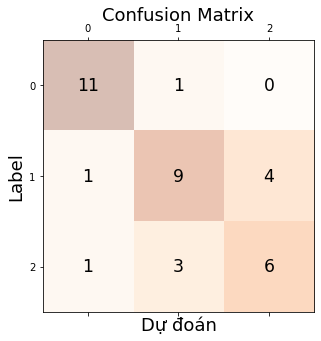

In [109]:
truc_quan_kq(y_test, y_pred_knn_wine)

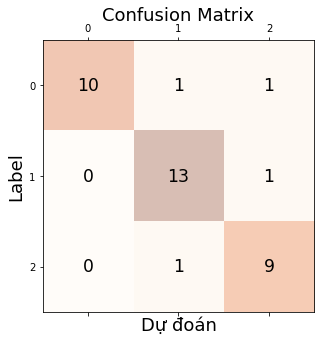

In [110]:
truc_quan_kq(y_test, y_pred_nb_wine)

c. Xác định mô hình vượt trội?

Sau quá trình huấn luyện, đánh giá hiệu năng và vẽ bảng so sánh kết quả của từng mô hình. 

Ta thấy được *mô hình Naive Bayes* **vượt trội hơn** *mô hình k-NN* đối với tập dữ liệu wine.data

**Câu 1 : Tải tập dữ liệu Breast cancer**
2. [Breast cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)


Đọc tập dữ liệu Breast cancer 

In [23]:
data_cancer = pd.read_csv('/content/breast-cancer-wisconsin.data', header = None)
data_cancer.sample(5)

,0,1,2,3,4,5,6,7,8,9,10
621,1096352,6,3,3,3,3,2,6,1,1,2
409,1237674,3,1,2,1,2,1,2,1,1,2
152,1189286,10,10,8,6,4,5,8,10,1,4
345,826923,1,1,1,1,2,1,1,1,1,2
536,1113061,5,1,1,1,2,1,3,1,1,2



Khai báo các thuộc tính của tập dữ liệu 

1. Sample code number (ID - Các con số dùng để định danh)

2. Clump Thickness (1-10) (Tức là giá trị của nó là số nguyên nằm từ 1 đến 10)

3. Uniformity of Cell Size (1-10)

4. Uniformity of Cell Shape (1-10)

5. Marginal Adhesion (1-10)

6. Single Epithelial Cell Size (1-10)

7. Bare Nuclei (1-10)

8. Bland Chromatin (1-10)

9. Normal Nucleoli (1-10)

10. Mitoses (1-10)

11. Class (2- cho bệnh lành tính và 4 - cho bệnh ác tính) (Đây chính là biến nhãn lớp)


Chỉnh sửa tên các thuộc tính của tập dữ liệu

In [24]:
data_cancer.columns = ['Sample_code_number', 'Clump_Thicknes', 
                     'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 
                     'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 
                     'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli',
                     'Mitoses', 'Class']
data_cancer.sample(5)

,Sample_code_number,Clump_Thicknes,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
1,1002945,5,4,4,5,7,10,3,2,1,2
74,1126417,10,6,4,1,3,4,3,2,3,4
336,797327,6,5,5,8,4,10,3,4,1,4
43,1102573,5,6,5,6,10,1,3,1,1,4
373,521441,5,1,1,2,2,1,2,1,1,2


**Câu 2 : Xác định tập dữ liệu Breast cancer**

*1. Thuộc tính nào đóng vai trò nhãn lớp?*

Trả lời: Class 

*2. Tập dữ liệu nào phục vụ bài toán phân lớp nhị phân? Bài toán nào phân lớp đa nhãn?*

Trả lời: Tập dữ liệu Breast cancer phục vụ bài toán nhị phân 

*3. Thuộc tính nào không cần thiết trong huấn luyện mô hình?*

Trả lời: Class 


**Câu 3: Xây dựng mô hình phân lớp LogisticRegression, k-NN và Naive Bays cho 2 tập dữ liệu trên. Yêu cầu:**


*1. Xác định nhãn lớp có cân bằng không?*

Trả lời : Các nhãn lớp không cân bằng 

In [25]:
fre = data_cancer[['Clump_Thicknes', 'Class']].groupby(['Class']).count()
fre.columns = ['Times']
fre

,Times
Class,
2,458
4,241


Xác định các dữ liệu đầu vào 

In [26]:
# tập dữ liệu có dạng 2, 4 khi tính sẽ xảy ra lỗi. 
# Class(biến nhãn lớp): 2- cho bệnh lành tính và 4-cho bệnh ác tính
# Ta thay đổi class tương tự bằng các nhãn 0,1 
X_cancer = data_cancer[(['Clump_Thicknes', 
                     'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 
                     'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 
                     'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli',
                     'Mitoses'])].values
class_cancer = data_cancer['Class']
n = len(class_cancer)
for i in range(n):
  if class_cancer[i] == 2:
    class_cancer[i] = 0
  else:
    class_cancer[i] = 1
y_cancer= class_cancer.values
print(X_cancer.shape)
print(y_cancer.shape)

(699, 9)
(699,)


In [27]:
#tập dữ liệu sau khi đã được gán nhãn tương ứng 
print (X_cancer.shape)
print(y_cancer)

(699, 9)
[0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1
 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0
 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0
 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 1 1

*2. Phân chia train – test theo tỉ lệ 80% - 20% có cần thực hiện xáo trộn dữ liệu hay không?*

Trả lời : Phân chia train – test theo tỉ lệ 80% - 20% cần thực hiện xáo trộn dữ liệu

In [28]:
X_train, X_test, y_train, y_test = train_test_split( 
    X_cancer, y_cancer, test_size=0.2, random_state=4,shuffle=True,stratify=y_cancer)
print('Kích thước dữ liệu train - test:')
print("\t\tX train: ", X_train.shape, "; y train: ",y_train.shape)
print("\t\tX test: ", X_test.shape, "; y test: ",y_test.shape)

Kích thước dữ liệu train - test:
		X train:  (559, 9) ; y train:  (559,)
		X test:  (140, 9) ; y test:  (140,)


Huấn luyện mô hình Logistic Regression 

In [34]:
lg = LogisticRegression(random_state=0)
lg.fit(X_train, y_train)
y_pred_lg = lg.predict(X_test)

Huấn luyện mô hình k-NN


In [43]:
knn_cancer = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 3)
knn_cancer.fit(X_train, y_train)
y_pred_knn_cancer = knn_cancer.predict(X_test)

Huấn luyện mô hình Naive Bayes 

In [44]:
mnb_cancer = MultinomialNB()
mnb_cancer.fit(X_train, y_train)
y_pred_mnb_cancer = mnb_cancer.predict(X_test)

*3. Thông báo kết quả **10-fold CV** của **quá trình huấn luyện** từng mô hình (sử dụng **cross_val_scores**)*

Cross-validation là một phương pháp kiểm tra độ chính xác của 1 máy học dựa trên một tập dữ liệu học cho trước

Quá trình huấn luyện mô hình Logistic Regression 

In [32]:
k_fold(lg, X_cancer, y_cancer)

* Chi tiết các fold
> Fold 1  - Accuracy: 0.9142857142857143
> Fold 2  - Accuracy: 0.9714285714285714
> Fold 3  - Accuracy: 0.9571428571428572
> Fold 4  - Accuracy: 0.9142857142857143
> Fold 5  - Accuracy: 1.0
> Fold 6  - Accuracy: 0.9714285714285714
> Fold 7  - Accuracy: 0.9714285714285714
> Fold 8  - Accuracy: 1.0
> Fold 9  - Accuracy: 0.9714285714285714
> Fold 10  - Accuracy: 1.0
* Đánh giá tổng thể các folds: 
> Accuracy: 0.9671428571428571 (Độ lệch +- 0.03000000000000001)


Quá trình huấn luyện mô hình k-NN 

In [36]:
k_fold(knn_cancer,X_cancer,y_cancer)

* Chi tiết các fold
> Fold 1  - Accuracy: 0.8571428571428571
> Fold 2  - Accuracy: 0.9142857142857143
> Fold 3  - Accuracy: 0.9714285714285714
> Fold 4  - Accuracy: 0.9
> Fold 5  - Accuracy: 0.9714285714285714
> Fold 6  - Accuracy: 0.9285714285714286
> Fold 7  - Accuracy: 0.9857142857142858
> Fold 8  - Accuracy: 1.0
> Fold 9  - Accuracy: 0.9857142857142858
> Fold 10  - Accuracy: 0.9565217391304348
* Đánh giá tổng thể các folds: 
> Accuracy: 0.947080745341615 (Độ lệch +- 0.04334033135074688)


Quá trình huấn luyện Naive Bayes 

In [38]:
k_fold(mnb_cancer,X_cancer,y_cancer)

* Chi tiết các fold
> Fold 1  - Accuracy: 0.8285714285714286
> Fold 2  - Accuracy: 0.7714285714285715
> Fold 3  - Accuracy: 0.8857142857142857
> Fold 4  - Accuracy: 0.9142857142857143
> Fold 5  - Accuracy: 0.9
> Fold 6  - Accuracy: 0.8142857142857143
> Fold 7  - Accuracy: 0.8857142857142857
> Fold 8  - Accuracy: 0.9428571428571428
> Fold 9  - Accuracy: 0.9428571428571428
> Fold 10  - Accuracy: 0.9565217391304348
* Đánh giá tổng thể các folds: 
> Accuracy: 0.8842236024844722 (Độ lệch +- 0.05828470290830891)


*4. Dựa vào kết quả dự đoán của từng mô hình - ŷ và tập dữ liệu kiểm chứng - y$_{test}$, hãy:*

a. Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số: (i) accuracy; (ii) precision;
(iii) recall; và (iv) f1-measure.

Đánh giá hiệu năng mô hình Logistic Regression 

In [73]:
i_lg,ii_lg,iii_lg,iv_lg= danh_gia_mo_hinh(y_test,y_pred_lg)
print("Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(i) accuracy:",i_knn)
print("Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(ii) precision:",ii_knn)
print("Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(iii) recall:",iii_knn) 
print("Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(iv) f1-measure:",iv_knn)

Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(i) accuracy: 0.9214285714285714
Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(ii) precision: [0.92631579 0.91111111]
Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(iii) recall: [0.95652174 0.85416667]
Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(iv) f1-measure: [0.9411764705882354, 0.8817204301075269]


Đánh giá hiệu năng mô hình k-NN 

In [46]:
i_knn,ii_knn,iii_knn,iv_knn= danh_gia_mo_hinh(y_test,y_pred_knn_cancer)
print("Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(i) accuracy:",i_knn)
print("Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(ii) precision:",ii_knn)
print("Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(iii) recall:",iii_knn) 
print("Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(iv) f1-measure:",iv_knn)

Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(i) accuracy: 0.9571428571428572
Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(ii) precision: [0.9673913 0.9375   ]
Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(iii) recall: [0.9673913 0.9375   ]
Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(iv) f1-measure: [0.967391304347826, 0.9375]


Đánh giá hiệu năng mô hình Naive Bayes 

In [47]:
i_knn,ii_knn,iii_knn,iv_knn= danh_gia_mo_hinh(y_test,y_pred_mnb_cancer)
print("Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(i) accuracy:",i_knn)
print("Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(ii) precision:",ii_knn)
print("Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(iii) recall:",iii_knn) 
print("Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(iv) f1-measure:",iv_knn)

Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(i) accuracy: 0.9214285714285714
Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(ii) precision: [0.92631579 0.91111111]
Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(iii) recall: [0.95652174 0.85416667]
Đánh giá hiệu năng của từng mô hình theo các bộ chỉ số(iv) f1-measure: [0.9411764705882354, 0.8817204301075269]


b. Vẽ bảng ghi kết quả so sánh các chỉ số trên của từng mô hình

In [70]:
#báo cáo phân lớp tổng hợp của mô hình logistic regression 
target_names = ['class 0', 'class 1']
report3 = classification_report(y_test, y_pred_lg, target_names=target_names)
print(report3)

              precision    recall  f1-score   support

     class 0       0.96      0.97      0.96        92
     class 1       0.94      0.92      0.93        48

    accuracy                           0.95       140
   macro avg       0.95      0.94      0.94       140
weighted avg       0.95      0.95      0.95       140



In [71]:
#báo cáo phân lớp tổng hợp của mô hình k-NN 
report4 = classification_report(y_test, y_pred_knn_cancer, target_names=target_names)
print(report4)

              precision    recall  f1-score   support

     class 0       0.97      0.97      0.97        92
     class 1       0.94      0.94      0.94        48

    accuracy                           0.96       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



In [72]:
#báo cáo phân lớp tổng hợp của mô hình Naive Bayes 
report5 = classification_report(y_test, y_pred_mnb_cancer, target_names=target_names)
print(report5)

              precision    recall  f1-score   support

     class 0       0.93      0.96      0.94        92
     class 1       0.91      0.85      0.88        48

    accuracy                           0.92       140
   macro avg       0.92      0.91      0.91       140
weighted avg       0.92      0.92      0.92       140



In [74]:
#bảng ghi kết quả so sánh các chỉ số trên của từng mô hình
danh_gia_knn = [i_knn, ii_knn, iii_knn, iv_knn]
danh_gia_mnb = [i_nb, ii_nb, iii_nb, iv_nb]
danh_gia_lg = [i_lg,ii_lg,iii_lg,iv_lg]
data = {'k-NN': danh_gia_knn, 
        'Naive Bayes': danh_gia_mnb,
        'Logistic Regression': danh_gia_lg }
id = ['accuracy (so sánh giữa 2 mô hình)', 'precision (so sánh giữa các nhãn lớp)', 'recall (so sánh giữa các nhãn lớp)', 'f1-measure (so sánh giữa các nhãn lớp)']
df_cancer = pd.DataFrame(data=data, index = id)
df_cancer

,k-NN,Naive Bayes,Logistic Regression
accuracy (so sánh giữa 2 mô hình),0.921429,0.888889,0.95
precision (so sánh giữa các nhãn lớp),"[0.9263157894736842, 0.9111111111111111]","[1.0, 0.8666666666666667, 0.8181818181818182]","[0.956989247311828, 0.9361702127659575]"
recall (so sánh giữa các nhãn lớp),"[0.9565217391304348, 0.8541666666666666]","[0.8333333333333334, 0.9285714285714286, 0.9]","[0.967391304347826, 0.9166666666666666]"
f1-measure (so sánh giữa các nhãn lớp),"[0.9411764705882354, 0.8817204301075269]","[0.9090909090909091, 0.896551724137931, 0.8571...","[0.9621621621621621, 0.9263157894736843]"


Trực quan tập dữ liệu 

In [62]:
def truc_quan_kq(y_test, y_pred_knn):
  conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_knn)
  #sử dụng Matplotlib để vẽ confusion matrix 
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
  plt.xlabel('Dự đoán', fontsize=18)
  plt.ylabel('Label', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()

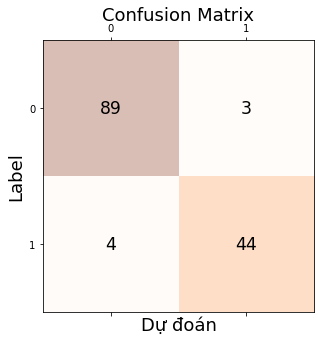

In [75]:
truc_quan_kq(y_test, y_pred_lg)

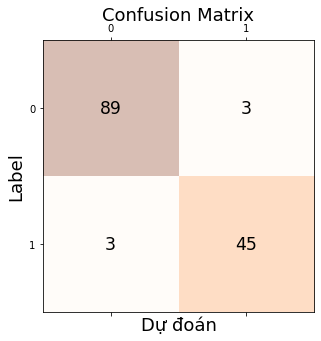

In [63]:
truc_quan_kq(y_test, y_pred_knn_cancer)

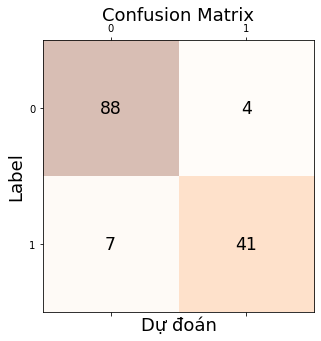

In [64]:
truc_quan_kq(y_test, y_pred_mnb_cancer)

c. Xác định mô hình vượt trội?

Sau quá trình huấn luyện, đánh giá hiệu năng và vẽ bảng so sánh kết quả của từng mô hình. 

Ta thấy được *mô hình Logistic Regression* **vượt trội hơn** *mô hình k-NN* và *mô hình Naive Bayes* đối với tập dữ liệu breast_cancer.data